In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu, ks_2samp

from statannot import add_stat_annotation

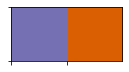

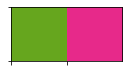

In [2]:
custcol = ["#7570b3", "#d95f02"]
custcoltemp = ["#66a61e", "#e7298a"]

sns.palplot(sns.color_palette(custcol))
sns.palplot(sns.color_palette(custcoltemp))

In [3]:
datapath = "./"
file_to_open = datapath + "Figure1ab_raw.txt"

# print(os.path.realpath(file_to_open))


In [4]:
data0 = pd.read_csv(file_to_open, sep = "\t", header = 0)

In [5]:
data0["titer"] = np.log10(data0['titer'])

In [6]:
data1 = data0.groupby(["hpi", "temperature", "virus", "donor"]).mean().reset_index()
data1

,hpi,temperature,virus,donor,replicate,titer
0,0,33,SARS,0,1.5,5.102060
1,0,33,SARS,11,1.5,6.000000
2,0,33,SARS-2,0,1.5,4.717284
3,0,33,SARS-2,11,1.5,5.001730
4,0,33,mock,0,1.5,0.000000
...,...,...,...,...,...,...
217,96,37,mock,3,1.5,0.000000
218,96,37,mock,4,1.5,0.000000
219,96,37,mock,5,1.5,0.000000
220,96,37,mock,6,1.5,0.000000


In [7]:
t33 = data1.loc[data1["temperature"]==33]
t37 = data1.loc[data1["temperature"]==37]
rSARS = data1.loc[data1["virus"]=="SARS"]
rSARS2 = data1.loc[data1["virus"]=="SARS-2"]

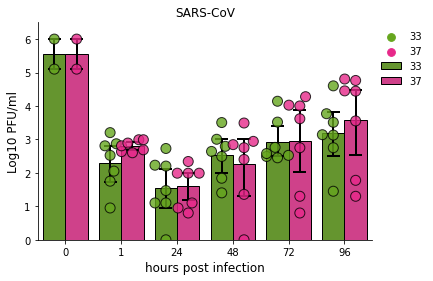

In [8]:
fig, ax = plt.subplots()
g = sns.barplot(data= rSARS,
                x='hpi',
                y='titer', 
                hue="temperature",
                palette = sns.color_palette(custcoltemp),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )

g1 = sns.swarmplot(data= rSARS,
                x='hpi',
                y='titer', 
                hue="temperature",
                dodge = True, 
                palette = sns.color_palette(custcoltemp),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.8,
                )


plt.yscale("linear")
plt.ylim([0,6.5])
plt.title("SARS-CoV")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

# plt.savefig('apical_SARS.pdf', bbox_inches = 'tight')

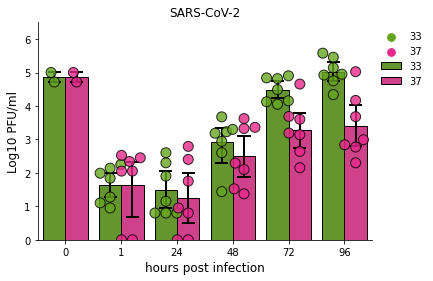

In [9]:
fig, ax = plt.subplots()
g = sns.barplot(data= rSARS2,
                x='hpi',
                y='titer', 
                hue="temperature",
                palette = sns.color_palette(custcoltemp),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )

g1 = sns.swarmplot(data= rSARS2,
                x='hpi',
                y='titer', 
                hue="temperature",
                dodge = True, 
                palette = sns.color_palette(custcoltemp),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.8,
                )

plt.yscale("linear")
plt.ylim([0,6.5])
plt.title("SARS-CoV-2")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

# plt.savefig('apical_SARS2.pdf', bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_33 v.s. 1_37: t-test paired samples, P_val=9.756e-01 stat=3.186e-02
24_33 v.s. 24_37: t-test paired samples, P_val=4.584e-01 stat=7.922e-01
96_33 v.s. 96_37: t-test paired samples, P_val=9.229e-04 stat=6.051e+00
72_33 v.s. 72_37: t-test paired samples, P_val=1.837e-03 stat=5.296e+00
48_33 v.s. 48_37: t-test paired samples, P_val=1.891e-01 stat=1.481e+00


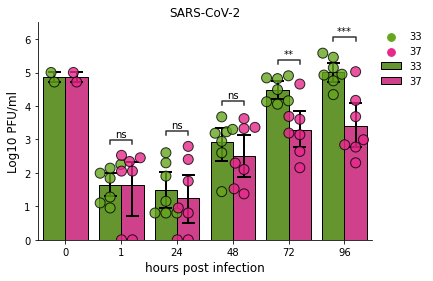

In [10]:
x = "hpi"
y='titer'
hue = "temperature"
box_pairs=[((96.0, 33.0), (96.0, 37.0)),
          ((72.0, 33.0), (72.0, 37.0)),
           ((48.0, 33.0), (48.0, 37.0)),
            ((24.0, 33.0), (24.0, 37.0)),
           ((1.0, 33.0), (1.0, 37.0)),
          ]

fig, ax = plt.subplots()
g = sns.barplot(data= rSARS2,
                x='hpi',
                y='titer', 
                hue="temperature",
                palette = sns.color_palette(custcoltemp),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )

g1 = sns.swarmplot(data= rSARS2,
                x='hpi',
                y='titer', 
                hue="temperature",
                dodge = True, 
                palette = sns.color_palette(custcoltemp),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.8,
                )



add_stat_annotation(ax, data=rSARS2, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='t-test_paired',  comparisons_correction= None, loc='inside', verbose=2)


plt.yscale("linear")
plt.ylim([0,6.5])
plt.title("SARS-CoV-2")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig('Figure1b.pdf', bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_33 v.s. 1_37: t-test paired samples, P_val=1.826e-01 stat=-1.507e+00
24_33 v.s. 24_37: t-test paired samples, P_val=8.866e-01 stat=-1.488e-01
96_33 v.s. 96_37: t-test paired samples, P_val=4.800e-01 stat=-7.528e-01
72_33 v.s. 72_37: t-test paired samples, P_val=9.269e-01 stat=-9.573e-02
48_33 v.s. 48_37: t-test paired samples, P_val=6.502e-01 stat=4.771e-01


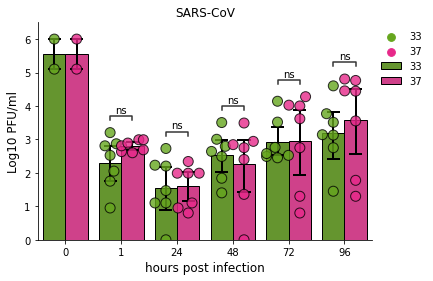

In [11]:
x = "hpi"
y='titer'
hue = "temperature"
box_pairs=[((96.0, 33.0), (96.0, 37.0)),
          ((72.0, 33.0), (72.0, 37.0)),
           ((48.0, 33.0), (48.0, 37.0)),
            ((24.0, 33.0), (24.0, 37.0)),
           ((1.0, 33.0), (1.0, 37.0)),
          ]

fig, ax = plt.subplots()
g = sns.barplot(data= rSARS,
                x='hpi',
                y='titer', 
                hue="temperature",
                palette = sns.color_palette(custcoltemp),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )

g1 = sns.swarmplot(data= rSARS,
                x='hpi',
                y='titer', 
                hue="temperature",
                dodge = True, 
                palette = sns.color_palette(custcoltemp),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.8,
                )

add_stat_annotation(ax, data=rSARS, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='t-test_paired',  comparisons_correction= None, loc='inside', verbose=2)


plt.yscale("linear")
plt.ylim([0,6.5])
plt.title("SARS-CoV")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig('Figure1a.pdf', bbox_inches = 'tight')